In [228]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 01 - Problem (case study)

## Data Description

This dataset contains customer data from a car insurance company.
It contains multiple kinds of information such as:
    Personal data - gender, location, education, income, etc
    Vehicle data - vehicle size and class
    Policy data - monthly premium, policy type, time since last claim, total claim amount, etc

## Goal

The goal of this study is to develop a model that best predicts the total amount a new customer will claim on their insurance policy.
This model will have as a target the Total Claim Amount column on the dataset, which contains the claimed amount for all the already insured customers.
To achieve this, the model will take in the several different features contained in the dataset.

# 02 - Getting Data

## Read the .csv file

In [197]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# 03 - Cleaning/Wrangling/EDA

## Change headers names

In [198]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## Deal with NaN values

In [199]:
print(data.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


## Categorical Features

In [200]:
data_cat = data.select_dtypes('object')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           9134 non-null   object
 1   state              9134 non-null   object
 2   response           9134 non-null   object
 3   coverage           9134 non-null   object
 4   education          9134 non-null   object
 5   effective_to_date  9134 non-null   object
 6   employmentstatus   9134 non-null   object
 7   gender             9134 non-null   object
 8   location_code      9134 non-null   object
 9   marital_status     9134 non-null   object
 10  policy_type        9134 non-null   object
 11  policy             9134 non-null   object
 12  renew_offer_type   9134 non-null   object
 13  sales_channel      9134 non-null   object
 14  vehicle_class      9134 non-null   object
 15  vehicle_size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


## Numerical Features

In [201]:
data_num = data.select_dtypes(np.number)
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


## Exploration

In [202]:
for col in data_cat.columns:
    print(col,'\n', data_cat[col].value_counts(),'\n')

customer 
 BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64 

state 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64 

response 
 No     7826
Yes    1308
Name: response, dtype: int64 

coverage 
 Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

education 
 Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

effective_to_date 
 1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/

#### As seen above:

   The first column on the dataset contains an ID string for each customer, which is irrelevant for the model.

   The column 'effective_to_date' contains a very small range of dates, from January to February of 2011, which does not provide much revelant information for the model.
   
   The column 'policy' contains subcategories of the values in 'policy_type', dividing them into 3 levels each. It will be best to manipulate these columns to reduce the change of multicollinearity.

customer_lifetime_value


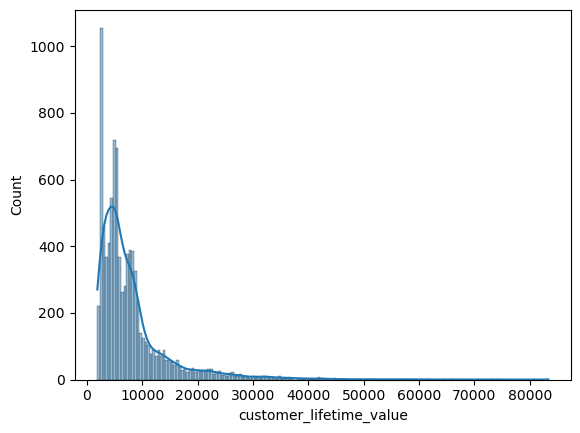

income


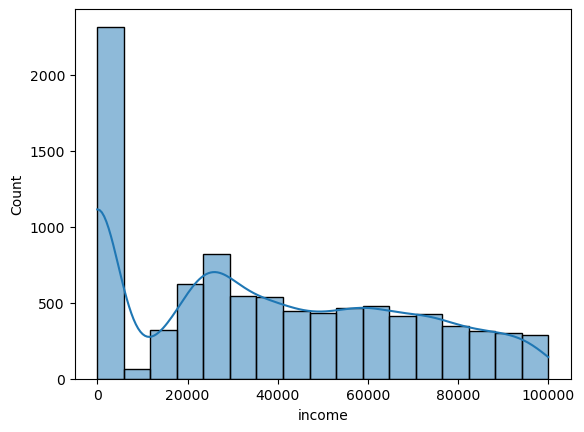

monthly_premium_auto


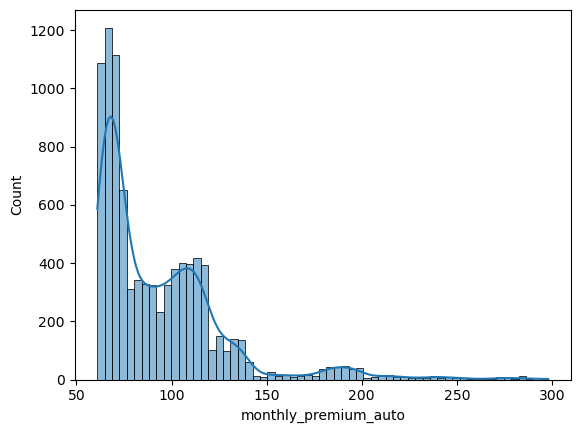

months_since_last_claim


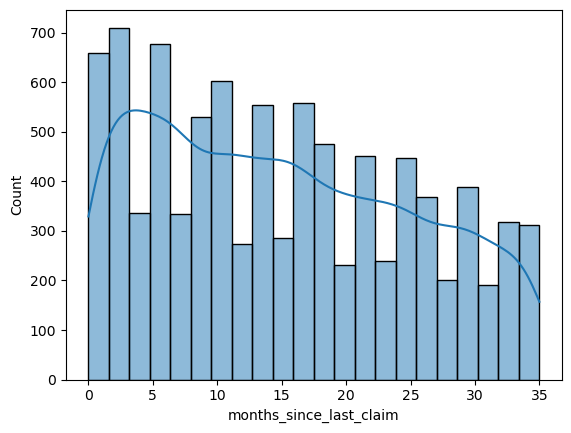

months_since_policy_inception


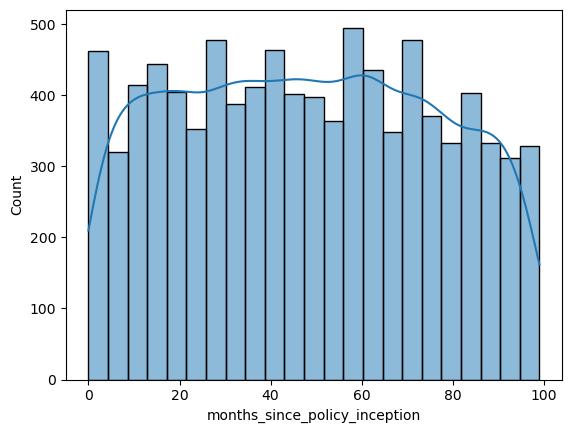

number_of_open_complaints


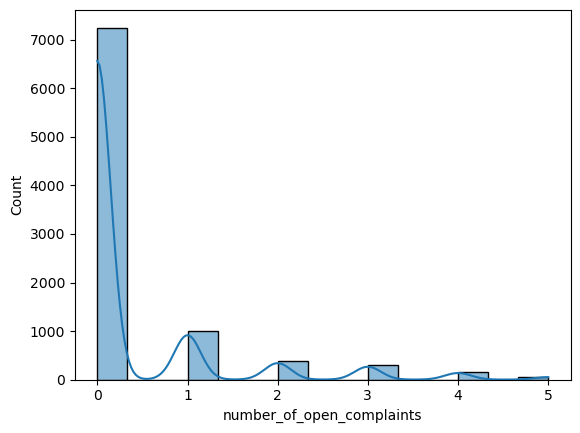

number_of_policies


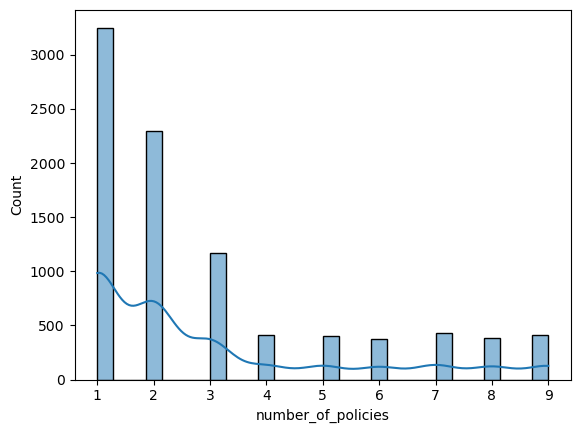

total_claim_amount


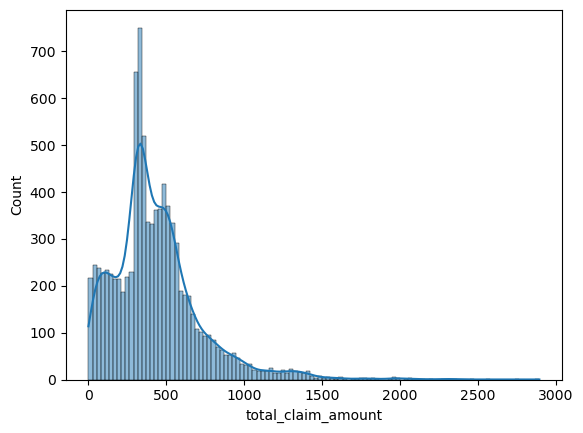

In [203]:
for col in data_num.columns:
  print(col)
  sns.histplot(data_num[col], kde=True)
  plt.show()

#### As seen above:

   Most numerical columns follow a normal distribution, with a skew to the positive side, which makes sense when dealing with monetary values.
   
   The exception being time based columns, 'months_since_policy_inception' and 'months_since_last_claim'

In [204]:
corr_matrix = data_num.corr()
corr_matrix

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

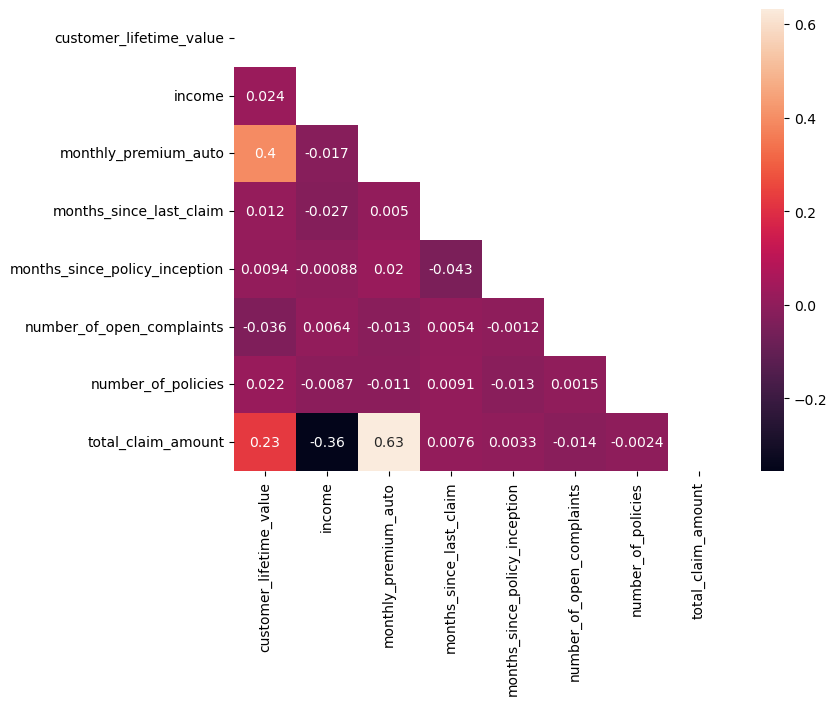

In [205]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

#### As seen above:

The dataset has features that do not show any high level of correlation amongst themselves, but also do not show any high correlation with the target.

# 04 - Processing Data

Dropping the two columns that were found to contain irrelevant information for the model.

Extracting and keeping only the subcategory 'numerical part' on the 'policy' column, which will not cause any data loss, and will help reduce multicollinearity after enconding

In [206]:
data.drop(['effective_to_date', 'customer'], axis=1, inplace=True)
data['policy'] = data['policy'].str[-1]
data['policy'].value_counts()

3    4588
2    2881
1    1665
Name: policy, dtype: int64

## Dealing with outliers

As the outliers on the dataset were shown to be positive only, only the upper IQR is necessary to apply the filter

In [207]:
Q3 = np.quantile(data["total_claim_amount"], 0.75)
Q1 = np.quantile(data["total_claim_amount"], 0.25)
IQR = Q3 - Q1
upper_range = Q3 + 1.5 * IQR

data_no = data[data["total_claim_amount"] < upper_range].copy()
data_no.reset_index(drop=True, inplace=True)
len(data_no.index)

8681

## Normalization

In [208]:
x = data_no.drop(['total_claim_amount'], axis=1)
y = data_no['total_claim_amount']

In [209]:
x_num = x.select_dtypes(np.number)

scaler = StandardScaler()
scaler.fit(x_num)

x_num_scaled = scaler.transform(x_num)
x_num_scaled = pd.DataFrame(x_num_scaled, columns = x_num.columns)
x_num_scaled

customer_lifetime_value    income  monthly_premium_auto  \
0                   -0.772891  0.580587             -0.739390   
1                    0.814984  0.332987              0.700041   
2                   -0.007125 -1.275476              0.626224   
3                   -0.765022  0.170350             -0.591756   
4                    0.088618  0.799196             -0.739390   
...                       ...       ...                   ...   
8676                 2.464757  1.097326             -0.591756   
8677                -0.720663 -0.562920             -0.370305   
8678                 0.074125 -1.275476             -0.148854   
8679                -0.026169 -0.551805              0.257139   
8680                -0.796682 -1.275476             -0.444122   

      months_since_last_claim  months_since_policy_inception  \
0                    1.684444                      -1.542542   
1                    0.294401                      -0.357794   
2                    0.294401                       0.611544   
3                   -0.301332                      -0.142386   
4                   -0.102754                       1.652686   
...                       ...                            ...   
8676                 0.294401                       1.473179   
8677                -0.102754                      -0.716809   
8678                -0.599198                      -0.393696   
8679                 1.883022                      -1.614344   
8680                -1.194931                       1.509080   

      number_of_open_complaints  number_of_policies  
0                     -0.422343           -0.821923  
1                     -0.422343           -0.402260  
2                     -0.422343            1.696056  
3                     -0.422343           -0.821923  
4                     -0.422343           -0.402260  
...                         ...                 ...  
8676                  -0.422343           -0.402260  
8677                  -0.422343           -0.821923  
8678                   2.863906           -0.402260  
8679                  -0.422343            0.017403  
8680                  -0.422343           -0.821923  

[8681 rows x 7 columns]

## Encoding Categorical Data

In [210]:
x_cat = x.select_dtypes('object')
x_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [211]:
x_cat_dummy = pd.get_dummies(x_cat, drop_first=True)
x_cat_dummy

state_California  state_Nevada  state_Oregon  state_Washington  \
0                    0             0             0                 1   
1                    0             1             0                 0   
2                    1             0             0                 0   
3                    0             0             0                 1   
4                    0             0             1                 0   
...                ...           ...           ...               ...   
8676                 1             0             0                 0   
8677                 1             0             0                 0   
8678                 1             0             0                 0   
8679                 1             0             0                 0   
8680                 1             0             0                 0   

      response_Yes  coverage_Extended  coverage_Premium  education_College  \
0                0                  0                 0                  0   
1                0                  0                 1                  0   
2                0                  0                 0                  0   
3                0                  0                 0                  0   
4                1                  0                 0                  0   
...            ...                ...               ...                ...   
8676             0                  0                 0                  0   
8677             1                  1                 0                  1   
8678             0                  1                 0                  0   
8679             0                  1                 0                  1   
8680             0                  1                 0                  1   

      education_Doctor  education_High School or Below  ...  \
0                    0                               0  ...   
1                    0                               0  ...   
2                    0                               0  ...   
3                    0                               0  ...   
4                    0                               0  ...   
...                ...                             ...  ...   
8676                 0                               0  ...   
8677                 0                               0  ...   
8678                 0                               0  ...   
8679                 0                               0  ...   
8680                 0                               0  ...   

      sales_channel_Branch  sales_channel_Call Center  sales_channel_Web  \
0                        0                          0                  0   
1                        0                          0                  0   
2                        0                          1                  0   
3                        0                          0                  0   
4                        0                          0                  1   
...                    ...                        ...                ...   
8676                     0                          0                  1   
8677                     1                          0                  0   
8678                     1                          0                  0   
8679                     1                          0                  0   
8680                     0                          1                  0   

      vehicle_class_Luxury Car  vehicle_class_Luxury SUV  vehicle_class_SUV  \
0                            0                         0                  0   
1                            0                         0                  0   
2                            0                         0                  1   
3                            0                         0                  0   
4                            0                         0                  0   
...                        ...                       ...    

## Splitting into train set and test set

In [212]:
x_concat = pd.concat([x_num_scaled, x_cat_dummy], axis=1)
x_concat

customer_lifetime_value    income  monthly_premium_auto  \
0                   -0.772891  0.580587             -0.739390   
1                    0.814984  0.332987              0.700041   
2                   -0.007125 -1.275476              0.626224   
3                   -0.765022  0.170350             -0.591756   
4                    0.088618  0.799196             -0.739390   
...                       ...       ...                   ...   
8676                 2.464757  1.097326             -0.591756   
8677                -0.720663 -0.562920             -0.370305   
8678                 0.074125 -1.275476             -0.148854   
8679                -0.026169 -0.551805              0.257139   
8680                -0.796682 -1.275476             -0.444122   

      months_since_last_claim  months_since_policy_inception  \
0                    1.684444                      -1.542542   
1                    0.294401                      -0.357794   
2                    0.294401                       0.611544   
3                   -0.301332                      -0.142386   
4                   -0.102754                       1.652686   
...                       ...                            ...   
8676                 0.294401                       1.473179   
8677                -0.102754                      -0.716809   
8678                -0.599198                      -0.393696   
8679                 1.883022                      -1.614344   
8680                -1.194931                       1.509080   

      number_of_open_complaints  number_of_policies  state_California  \
0                     -0.422343           -0.821923                 0   
1                     -0.422343           -0.402260                 0   
2                     -0.422343            1.696056                 1   
3                     -0.422343           -0.821923                 0   
4                     -0.422343           -0.402260                 0   
...                         ...                 ...               ...   
8676                  -0.422343           -0.402260                 1   
8677                  -0.422343           -0.821923                 1   
8678                   2.863906           -0.402260                 1   
8679                  -0.422343            0.017403                 1   
8680                  -0.422343           -0.821923                 1   

      state_Nevada  state_Oregon  ...  sales_channel_Branch  \
0                0             0  ...                     0   
1                1             0  ...                     0   
2                0             0  ...                     0   
3                0             0  ...                     0   
4                0             1  ...                     0   
...            ...           ...  ...                   ...   
8676             0             0  ...                     0   
8677             0             0  ...                     1   
8678             0             0  ...                     1   
8679             0             0  ...                     1   
8680             0             0  ...                     0   

      sales_channel_Call Center  sales_channel_Web  vehicle_class_Luxury Car  \
0                             0                  0                         0   
1                             0                  0                         0   
2                             1                  0                         0   
3                             0                  0                         0   
4                             0                  1                         0   
...                         ...                ...                       ...   
8676                          0                  1                         0   
8677                          0                  0                         0   
8678                          0                  0                         0   
8679                  

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x_concat, y, test_size=0.3, random_state=42)

# 05 - Modeling

## Apply model


In [214]:
lm = LinearRegression()
lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

# 06 - Model Validation

## R2

In [215]:
print("R2_score:", round(r2_score(y_test, predictions), 2))

R2_score: 0.78


## MSE

In [216]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 9946.987220541945


## RMSE

In [217]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", rmse)

RMSE: 99.73458387411031


## MAE

In [218]:
mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

MAE: 75.67931417010148


# 07 - Reporting

## Present results

This linear regression model achieved good results with the test data, with an R2 Score of 78%, indicating a high degree of correlation between it's predictions and the true values in the test split.

The regression plot below allows for a good visualization of this correlation.

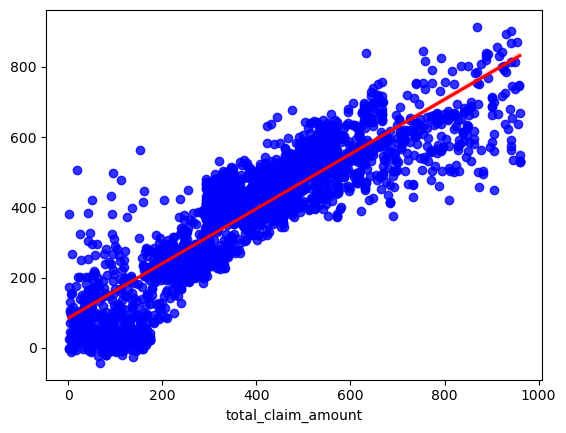

In [223]:
sns.regplot(x=y_test, y=predictions, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

The MAE of 75 represents a low margin of error, less than 10% of the range of values in the test split (1-960)

In [231]:
print("MAE:", mae)
y_test.describe()

MAE: 75.67931417010148


count    2605.000000
mean      387.263904
std       213.428820
min         1.208908
25%       242.842607
50%       360.670642
75%       525.600000
max       960.115399
Name: total_claim_amount, dtype: float64

The RMSE of 99 being close to the MAE value shows a low count of large errors, indicating that big outliers were sucessfully cleaned from the test data.